11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/10
31/31 [==============================] - 795s 26s/step - loss: 3.0465 - accuracy: 0.3709 - val_loss: 0.8131 - val_accuracy: 0.8000
Epoch 2/10
31/31 [==============================] - 788s 25s/step - loss: 0.8948 - accuracy: 0.7273 - val_loss: 0.4448 - val_accuracy: 0.8900
Epoch 3/10
31/31 [==============================] - 761s 25s/step - loss: 0.6830 - accuracy: 0.7913 - val_loss: 0.3240 - val_accuracy: 0.9200
Epoch 4/10
31/31 [==============================] - 780s 25s/step - loss: 0.4989 - accuracy: 0.8481 - val_loss: 0.2686 - val_accuracy: 0.9500
Epoch 5/10
31/31 [==============================] - 763s 25s/step - loss: 0.4608 - accuracy: 0.8605 - val_loss: 0.2362 - val_accuracy: 0.9500
Epoch 6/10
31/31 [==============================] - 750s 24s/step - loss: 0.4262 - accuracy: 0.8771 - val_loss: 0.2228 - val_accuracy: 0.9250
Epoch 7/10
31/31 [==============================] - 738s 24s/step - loss: 0.3481 - 

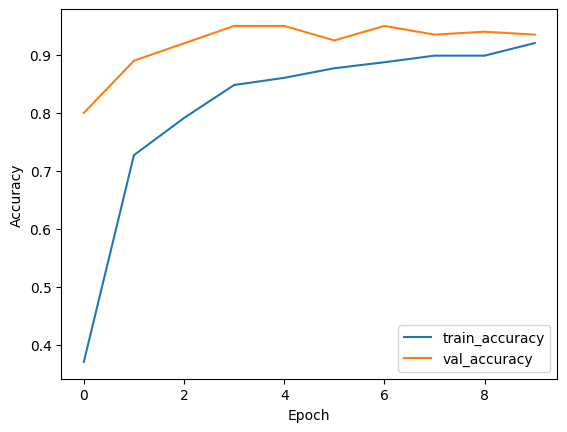

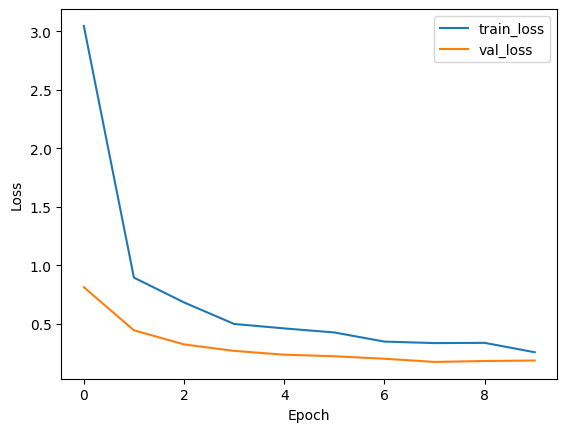

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reduce dataset size for lower computing power
x_train, y_train = x_train[:1000], y_train[:1000]  # Take first 1000 samples for training
x_test, y_test = x_test[:200], y_test[:200]  # Take first 200 samples for testing

# Convert grayscale images to RGB by repeating the single channel three times
x_train = np.stack((x_train,)*3, axis=-1)
x_test = np.stack((x_test,)*3, axis=-1)

# Normalize the images to [0, 1] range
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Resize images to (224, 224)
x_train_resized = np.array([tf.image.resize(image, (224, 224)) for image in x_train])
x_test_resized = np.array([tf.image.resize(image, (224, 224)) for image in x_test])

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Load the VGG16 model, excluding the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom top layers
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(10, activation='softmax')(x)  # 10 classes for MNIST

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation
datagen = ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

datagen.fit(x_train_resized)

# Train the model
history = model.fit(
    datagen.flow(x_train_resized, y_train, batch_size=32),
    steps_per_epoch=len(x_train) // 32,
    validation_data=(x_test_resized, y_test),
    epochs=10  # You can adjust the number of epochs
)

# Plot training history
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
